In [1]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.utils import convert_kstar_evol_type
from cosmic.plotting import evolve_and_plot

import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
# Helper functions and variables for unit conversions

def aui_to_porb(aui, m_tot):
    # aui: a list of values, initial separation in AU
    # m_tot: a list of values, total mass in M_sun
    # result: a list of values, orbital period in given condition in days
    res = []
    for i in range(len(aui)):
        res.append((1/m_tot[i]**0.5) * (aui[i]**1.5) * 365)
    return res

# Used to convert separation in R_sun into AU
unit_factor = 1 / 215.032

# Helper function: given an array of data and an array of target,
# return an array of index that is nearest to the target value.
import math 
def findNearestList(data, targetList):
    res = []
    for num in targetList:
        res.append(findNearest(data, num))
    return res

def findNearest(data, target):
    n = len(data)
    res = -1
    minDiff = 10**5
    for i in range(n):
        if data[i] == 10**(-5):
            continue
        if abs(target - data[i]) <= minDiff:
            res = i
            minDiff = abs(target - data[i])
    return res

In [3]:
# Default BSEDict
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 0.3, 'pts1': 0.001, 
           'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': -70.0, 
           'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 
           'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 
           'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 
           'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 
           'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 
           'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 
           'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

In [9]:
data = []
i = 4.9
while i <= 5.5:
    binary_set = InitialBinaryTable.InitialBinaries(m1=7, m2=1, 
                                                porb=aui_to_porb([i], [8])[0], ecc=0, 
                                                tphysf=15000, kstar1=1, kstar2=1, 
                                                metallicity=0.02)
    bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=binary_set, BSEDict=BSEDict)
    bpp['sep in AU'] = bpp['sep'] * unit_factor
    print(f'i = {i}')
    print(bpp[['tphys', 'mass_1', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])
    
    cond1 = (bpp['evol_type'] == 8) # Select evol type to be common envelope ends
    cond2 = (bpp['kstar_1'] <= 12) 
    cond3 = (bpp['kstar_1'] >= 10) # Select kstar_1 to be WD
    cond4 = (bpp['kstar_2'] <= 1)
    cond5 = (bpp['kstar_2'] >= 0) # Select kstar_2 to be MS

    row = bpp.loc[(cond1) & (cond2) & (cond3) & (cond4) & (cond5)].groupby('bin_num').first()
    data.append(row['sep in AU'])
    i = i + 0.01

i = 4.9
          tphys    mass_1  kstar_1  kstar_2  sep in AU  evol_type
0      0.000000  7.000000      1.0      1.0   4.895985        1.0
0     48.459967  6.944129      2.0      1.0   4.930419        2.0
0     48.617920  6.943478      3.0      1.0   4.930840        2.0
0     48.678764  6.941467      4.0      1.0   4.915125        2.0
0     54.850804  6.735530      5.0      1.0   4.991377        2.0
0     55.078960  6.698935      5.0      1.0   3.783900        3.0
0     55.078960  6.698935      5.0      1.0   3.783900        7.0
0     55.078960  1.775220      8.0      1.0   0.892281        8.0
0     55.078960  1.775220      8.0      1.0   0.892281        4.0
0     55.087812  1.772144      8.0      1.0   0.892786        3.0
0     55.087812  1.772144      8.0      1.0   0.892786        7.0
0     55.087812  1.118728     12.0      1.0   0.726298        8.0
0     55.087812  1.118728     12.0      1.0   0.726298        4.0
0  12124.725972  1.118728     12.0      2.0   0.726298        2.0
0 

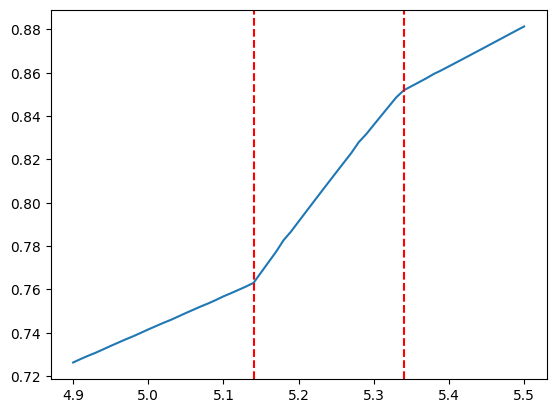

In [16]:
# print(data)
L = [4.9+0.01*i for i in range(len(data))]
plt.plot(L, data)
plt.axvline(x=5.14, color='r', linestyle='--')
plt.axvline(x=5.34, color='r', linestyle='--')

In [29]:
# Default BSEDict
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 0.3, 'pts1': 0.001, 
           'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': -60.0, 
           'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 
           'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 
           'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 
           'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 
           'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 
           'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 
           'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

In [30]:
data2 = []
i = 4.9
while i <= 5.5:
    binary_set = InitialBinaryTable.InitialBinaries(m1=7, m2=1, 
                                                porb=aui_to_porb([i], [8])[0], ecc=0, 
                                                tphysf=15000, kstar1=1, kstar2=1, 
                                                metallicity=0.02)
    bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=binary_set, BSEDict=BSEDict)
    bpp['sep in AU'] = bpp['sep'] * unit_factor
    # print(f'i = {i}')
    # print(bpp[['tphys', 'mass_1', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])
    
    cond1 = (bpp['evol_type'] == 8) # Select evol type to be common envelope ends
    cond2 = (bpp['kstar_1'] <= 12) 
    cond3 = (bpp['kstar_1'] >= 10) # Select kstar_1 to be WD
    cond4 = (bpp['kstar_2'] <= 1)
    cond5 = (bpp['kstar_2'] >= 0) # Select kstar_2 to be MS

    row = bpp.loc[(cond1) & (cond2) & (cond3) & (cond4) & (cond5)].groupby('bin_num').first()
    data2.append(row['sep in AU'])
    i = i + 0.01

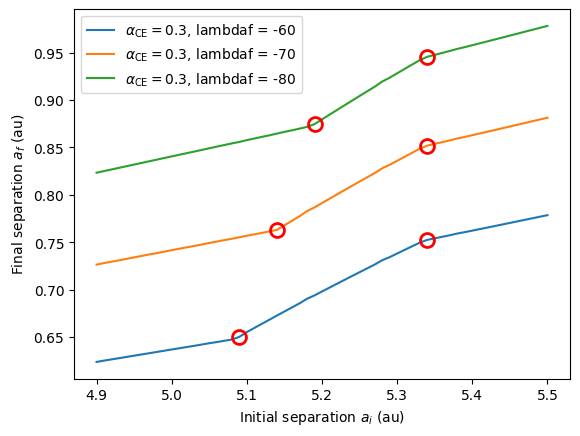

In [47]:
# print(data)
L = [4.9+0.01*i for i in range(len(data))]
plt.plot(L, data2, label = r'$\alpha_{\mathrm{CE}} = 0.3$, lambdaf = -60')
plt.plot(L, data, label = r'$\alpha_{\mathrm{CE}} = 0.3$, lambdaf = -70')
plt.plot(L, data1, label = r'$\alpha_{\mathrm{CE}} = 0.3$, lambdaf = -80')
plt.plot(5.09, data2[19], 'ro', markersize=10, markeredgewidth=2, markerfacecolor='none')
plt.plot(5.14, data[24], 'ro', markersize=10, markeredgewidth=2, markerfacecolor='none')
plt.plot(5.19, data1[29], 'ro', markersize=10, markeredgewidth=2, markerfacecolor='none')
plt.plot(5.34, data2[44], 'ro', markersize=10, markeredgewidth=2, markerfacecolor='none')
plt.plot(5.34, data[44], 'ro', markersize=10, markeredgewidth=2, markerfacecolor='none')
plt.plot(5.34, data1[44], 'ro', markersize=10, markeredgewidth=2, markerfacecolor='none')
# plt.axvline(x=5.34, color='r', linestyle='--')
plt.xlabel(r'Initial separation $a_i$ (au)')
plt.ylabel(r'Final separation $a_f$ (au)')
plt.legend()
plt.savefig('jump-zoom.png', dpi=300)
plt.show()